<a href="https://colab.research.google.com/github/yadicamila/Yadi-camila-almeida/blob/main/semana1/Ejercicio_Limpieza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Ejercicio: Limpieza usando pandas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Cargar el dataset DailyDelhiClimateTrain.csv
data =pd.read_csv("/content/sample_data/DailyDelhiClimateTrain.csv", header =0)
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
# Verificar las estadísticas generales del dataset
# Revisar la información, encuentre en los datos máximos y mínimos de las variables
# Revisar si encuentra algo fuera de lo normal

data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [4]:
data.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [27]:
# Eliminar las columnas meantemp, humidity y wind_speed. Mantenga la columna meanpressure
data_aux=data.drop(['meantemp','humidity','wind_speed'],axis=1)
data_aux.head()


,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


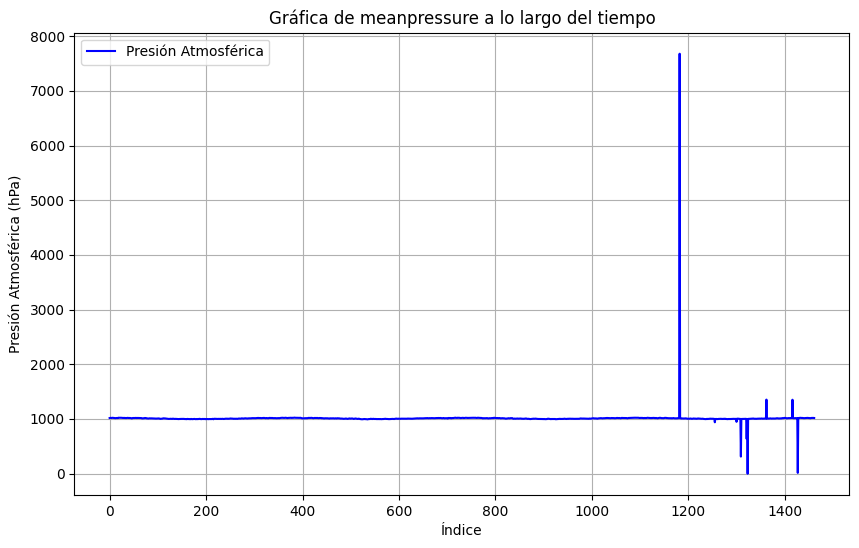

In [20]:
# Graficar los datos del campo meanpressure
# Qué puede decir de la gráfica?
# Hay algo atípico en esa respuesta temporal?
# Crear una gráfica de los datos de meanpressure
plt.figure(figsize=(10,6))
plt.plot(data_aux['meanpressure'], label='Presión Atmosférica', color='b')

plt.title('Gráfica de meanpressure a lo largo del tiempo')
plt.xlabel('Índice')
plt.ylabel('Presión Atmosférica (hPa)')
plt.legend()
plt.grid(True)
plt.show()

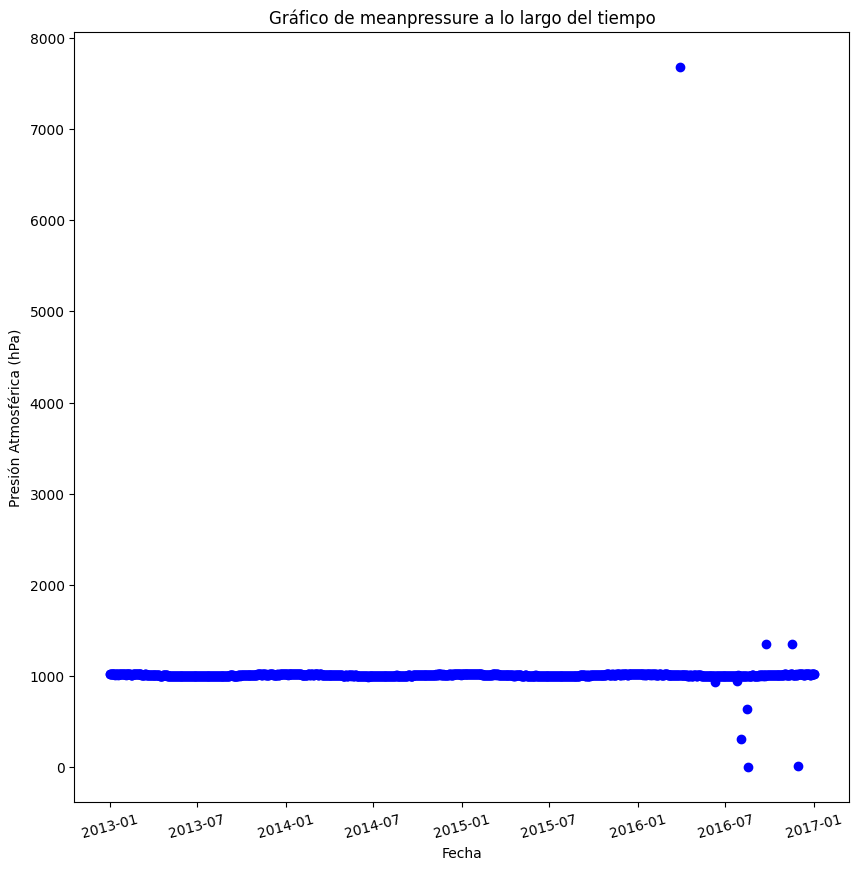

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
data_aux['date'] = pd.to_datetime(data_aux['date'])
plt.rc('figure', figsize=(10, 10))
plt.scatter(data_aux['date'], data_aux['meanpressure'], color='b')

plt.xticks(rotation=15)
plt.title('Gráfico de meanpressure a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Presión Atmosférica (hPa)')

plt.show()


In [28]:
anomalia_presion= data_aux[(data_aux['meanpressure'] < 950) | (data_aux['meanpressure'] > 1050)]

# Mostrar los valores anómalos
print(anomalia_presion)
print(anomalia_presion.count())

            date  meanpressure
1182  2016-03-28   7679.333333
1255  2016-06-09    938.066667
1300  2016-07-24    946.312500
1309  2016-08-02    310.437500
1321  2016-08-14    633.900000
1323  2016-08-16     -3.041667
1362  2016-09-24   1352.615385
1416  2016-11-17   1350.296296
1427  2016-11-28     12.045455
date            9
meanpressure    9
dtype: int64


<Axes: ylabel='meanpressure'>

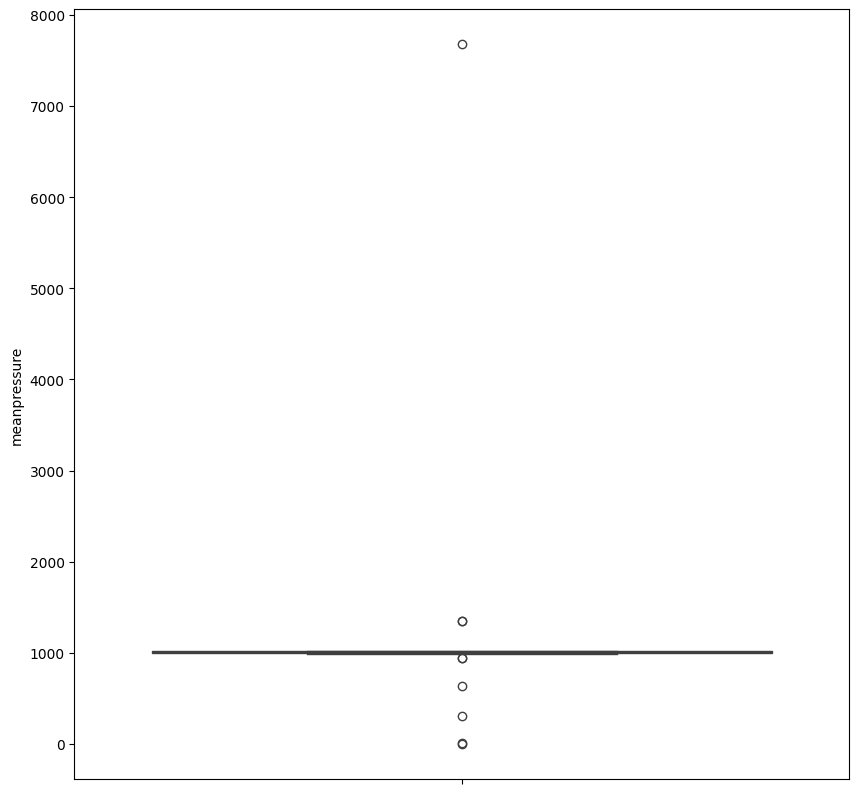

In [45]:
# Realice un diagrama de cajas y alambres para determinar visualmente si hay outliers
sns.boxplot(data=data_aux['meanpressure'])

In [35]:
# Calcular el parámetro Zscore para la columna meanpressure
data2=data_aux.loc[:,['meanpressure']].apply(stats.zscore)
data2.head()

,meanpressure
0,0.025321
1,0.037162
2,0.041972
3,0.033647
4,0.029946


In [63]:
# Variar el valor del humbral de Zscore para filtrar valores atípicos hasta que considere que la gráfica de la variable
#  meanpressure sea correcta
zscore=np.abs(stats.zscore(data_aux.loc[:,['meanpressure']]))
index=np.where(zscore >0.3)
print(index)

(array([1182, 1255, 1300, 1309, 1321, 1323, 1362, 1416, 1427]), array([0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [62]:
data_out=data_aux[(zscore<0.3).all(axis=1)]
data_out.head()

,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


In [64]:
# Para los datos sin outliers verificar nuevamente las estadísticas generales
# Qué puede decir de los valores máximos y mínimos de los datos filtrados
data_out.describe()

,meanpressure
count,1453.000000
mean,1008.269018
std,7.437835
min,991.375000
25%,1001.625000
50%,1008.571429
75%,1014.937500
max,1023.000000


<Axes: ylabel='meanpressure'>

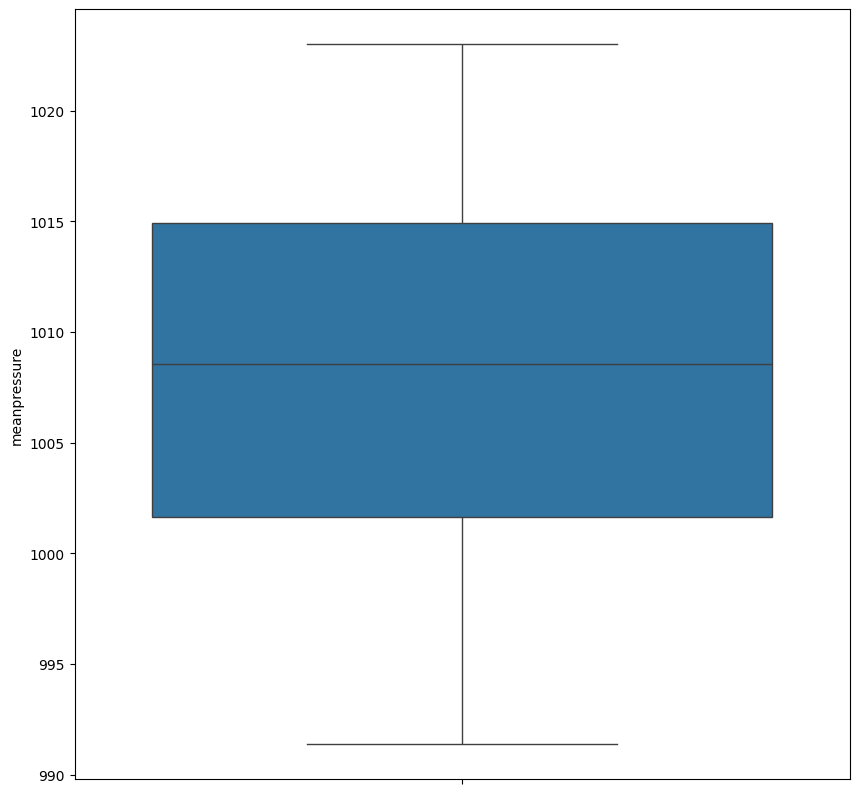

In [65]:
# Realice un diagrama de cajas y alambres para determinar visualmente si aún hay outliers
sns.boxplot(data=data_out['meanpressure'])

<ipython-input-66-4b2f8f50ef10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_out['date'] = pd.to_datetime(data_out['date'])


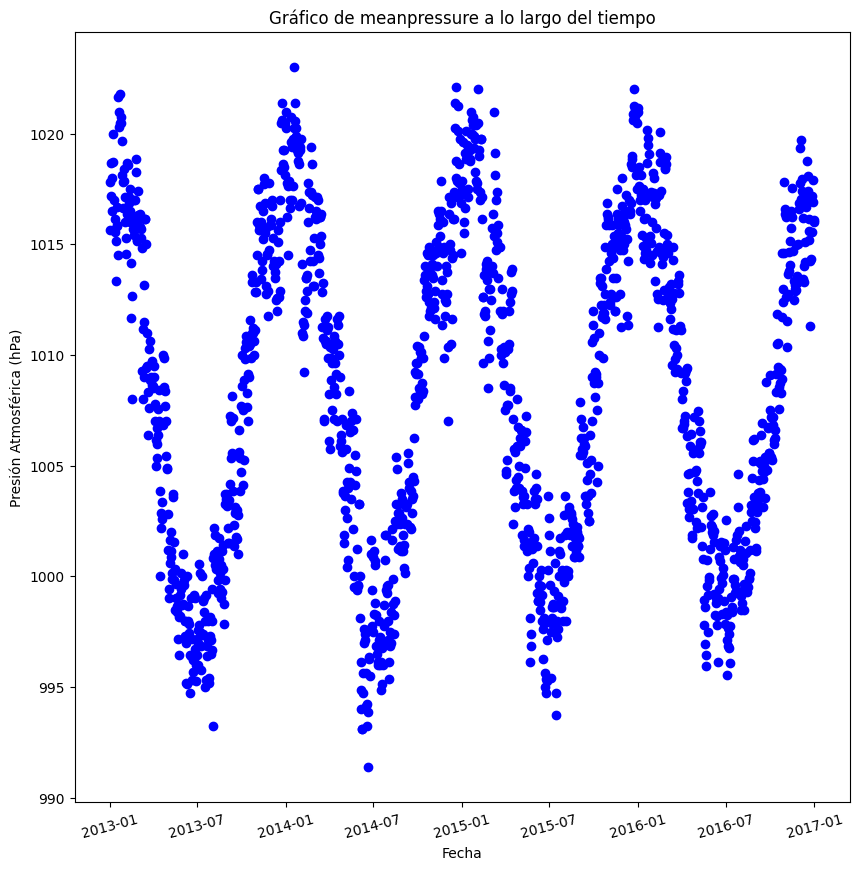

In [66]:

data_out['date'] = pd.to_datetime(data_out['date'])
plt.rc('figure', figsize=(10, 10))
plt.scatter(data_out['date'], data_out['meanpressure'], color='b')

plt.xticks(rotation=15)
plt.title('Gráfico de meanpressure a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Presión Atmosférica (hPa)')

plt.show()